In [1]:
!gdown --id 16QHXsGdLsh81ALNFvMkeBU6LyTEXbhmE
!unzip -q '/content/02-SMSSpamDetection.zip'

Downloading...
From: https://drive.google.com/uc?id=16QHXsGdLsh81ALNFvMkeBU6LyTEXbhmE
To: /content/02-SMSSpamDetection.zip
100% 907k/907k [00:00<00:00, 14.2MB/s]
replace 02-SMSSpamDetection/Model/sms_model_v1.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [2]:
import pickle
sms_model = pickle.load(open("/content/02-SMSSpamDetection/Model/sms_model_v1.pkl", "rb"))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking cod

In [3]:
import pandas as pd

val_file = '/content/02-SMSSpamDetection/TrainingSet/sms-hamspam-val.csv'

df = pd.read_csv(val_file,names=['label', 'message'], delimiter='\t')
print(df)

    label                                            message
0     ham  How do friends help us in problems? They give ...
1    spam  SIX chances to win CASH! From 100 to 20,000 po...
2    spam  Free entry in 2 a weekly comp for a chance to ...
3     ham                       We can make a baby in yo tho
4     ham                Just haven't decided where yet eh ?
..    ...                                                ...
940   ham  Why must we sit around and wait for summer day...
941   ham                    What type of stuff do you sing?
942   ham                                                 Ok
943   ham  U ned to convince him tht its not possible wit...
944   ham             Wake me up at  &lt;#&gt;  am morning:)

[945 rows x 2 columns]


In [4]:
y_val = df.label.map(dict(spam=1, ham=0))
x_val = df['message']
print(y_val)
print(x_val)

0      0
1      1
2      1
3      0
4      0
      ..
940    0
941    0
942    0
943    0
944    0
Name: label, Length: 945, dtype: int64
0      How do friends help us in problems? They give ...
1      SIX chances to win CASH! From 100 to 20,000 po...
2      Free entry in 2 a weekly comp for a chance to ...
3                           We can make a baby in yo tho
4                    Just haven't decided where yet eh ?
                             ...                        
940    Why must we sit around and wait for summer day...
941                      What type of stuff do you sing?
942                                                   Ok
943    U ned to convince him tht its not possible wit...
944               Wake me up at  &lt;#&gt;  am morning:)
Name: message, Length: 945, dtype: object


In [5]:
import numpy as np
y_pred = sms_model.predict(x_val.values)
y_pred = np.where(y_pred == 'spam', 1, 0)
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 

In [6]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

print(pd.DataFrame(confusion_matrix(y_val, y_pred),
                   columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

     pred_neg  pred_pos
neg       806         5
pos         5       129


As it can seen in the validation confusion matrix, there are some false positive and false negative results when used the threshold in 0.5 (max of spam/ham prediction).

In order to create better thresholds, I'm using the precision recall as scores.

In [7]:
y_scores = sms_model.predict_proba(x_val)[:, 1]
print(y_scores)

[0.09 0.97 0.99 0.05 0.03 0.   0.04 0.02 0.01 0.05 0.   0.01 0.02 0.
 0.89 0.04 0.96 0.03 0.03 0.14 1.   0.96 0.01 0.22 0.1  0.23 0.49 0.99
 0.08 0.03 0.   0.79 0.14 0.01 0.01 0.32 0.07 0.07 0.01 0.16 0.04 0.03
 0.03 0.03 0.02 0.03 0.   0.04 0.01 1.   0.03 0.02 0.05 0.07 0.06 0.01
 0.16 0.03 0.   0.   0.02 0.02 0.23 0.02 0.34 0.03 0.02 0.08 0.   0.05
 0.06 0.07 0.92 0.06 0.02 0.98 0.03 0.04 0.02 0.01 0.1  0.02 0.1  0.01
 0.   0.31 0.03 0.06 0.99 0.03 0.   0.99 0.03 0.07 0.   0.98 0.02 0.04
 0.06 0.04 0.02 0.18 0.02 1.   0.   0.9  0.12 0.02 0.03 0.04 0.01 0.21
 0.98 0.   0.04 0.   0.91 0.03 0.   1.   0.02 0.06 0.01 0.01 0.01 0.05
 0.05 0.02 0.95 0.15 0.1  0.01 0.   0.17 0.   0.82 0.85 0.02 0.07 0.03
 0.   0.05 0.25 0.95 0.   0.05 0.1  0.14 0.03 0.38 0.01 0.03 0.02 0.13
 0.01 0.19 0.03 0.17 0.04 0.03 0.01 0.   0.03 0.04 0.   0.   0.   0.11
 0.11 0.96 0.01 0.11 0.07 0.02 0.21 0.   0.03 0.02 0.14 0.   0.19 0.09
 0.06 0.05 0.86 0.19 0.03 0.03 0.08 0.03 0.14 0.   0.23 0.72 0.13 0.01
 0.23 0.

In [8]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

In [9]:
p, r, thresholds = precision_recall_curve(y_val, y_scores)

In [10]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

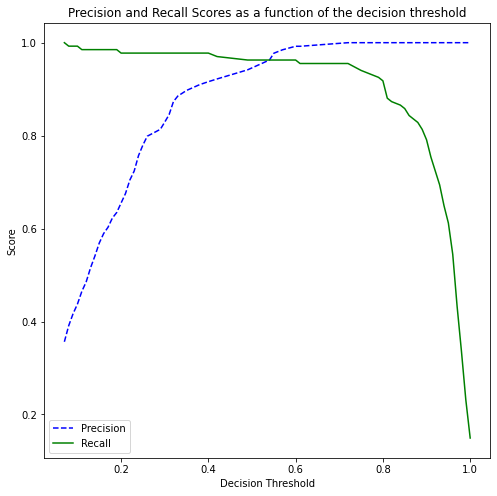

In [11]:
plot_precision_recall_vs_threshold(p, r, thresholds)

Evaluating this precision recall curve, it's possible to identify the decision threshold to zero the false positive and false negatives.

The thresholds are: 0.7 to avoid false negatives and 0.95 to avoid false positives, let's test them.

The values were rounded in order to provide a room for failing (the thresholds are a little bit higher to prevent errors).

In [12]:
#Avoiding false negatives

y_pred_adj = adjusted_classes(y_scores, 0.7)
print(pd.DataFrame(confusion_matrix(y_val, y_pred_adj),
                    columns=['pred_neg', 'pred_pos'], 
                    index=['neg', 'pos']))

     pred_neg  pred_pos
neg       811         0
pos         6       128


In [13]:
y_pred_adj = adjusted_classes(y_scores, 0.05)
print(pd.DataFrame(confusion_matrix(y_val, y_pred_adj),
                    columns=['pred_neg', 'pred_pos'], 
                    index=['neg', 'pos']))

     pred_neg  pred_pos
neg       494       317
pos         0       134


## Getting these values using the validation set we can go back to our SpamDetector class and use these values that we achieve as configurable parameters of the class.